## (1) INTERPOLATION

In [1]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# si un cpateur capte toutes les 2 secondes on perd des points
# pour utiliser les données on va interpoler.. remplacer les données
# manquantes

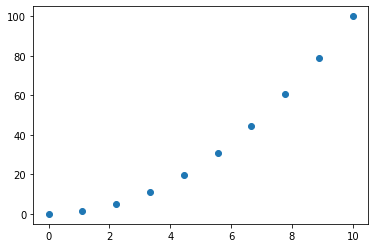

In [3]:
# ex : onva essayer de combler les trous entre les points bleus
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)
plt.show()

### interp1d()

In [4]:
#  on utilise interpolate du module scipy génère ue autre fonction f
# d'interpolation
# chargement de interp1d
from scipy.interpolate import interp1d

### interpolation linéaire kind='linear'

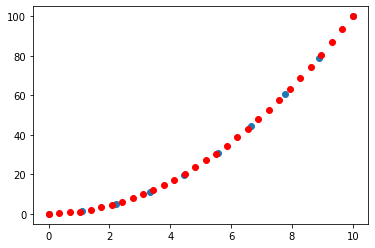

In [5]:
# on passe les données à interpoler et type d'interpolation
# type d'interpolation le plus basique = linéaire (ligne entre 2 points)
f = interp1d(x, y, kind='linear')

# utilsation de f pour passer un axe x avec 30 point
new_x= np.linspace(0, 10, 30)
result = f(new_x) # le tableau numpy avec les différents pointsinterpolés

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')
plt.show()


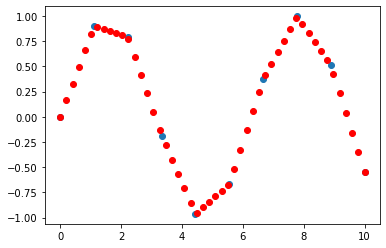

In [6]:
# différents type d'interpolation
# pour ce dataset, l'interpolation linéaire n'est pas suffisante pas top
x1 = np.linspace(0, 10, 10)
y1 = np.sin(x)

f1 = interp1d(x1, y1, kind='linear')

# utilsation de f pour passer un axe x avec 30 point
new_x1= np.linspace(0, 10, 50)
result1 = f1(new_x1) # le tableau numpy avec les différents pointsinterpolés

plt.scatter(x1, y1)
plt.scatter(new_x1, result1, c='r')
plt.show()


### interpolation cubique kind='cubic'

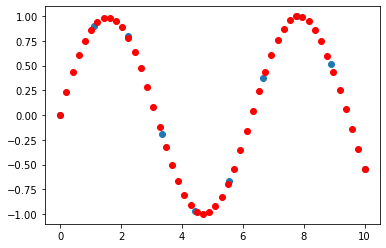

In [7]:
# pour optimiser il faut peut être prendre une interpolation cubique
# différents type d'interpolation
# pour ce dataset, l'interpolation linéaire n'est pas suffisante pas top
x1 = np.linspace(0, 10, 10)
y1 = np.sin(x)

f1 = interp1d(x1, y1, kind='cubic')

# utilsation de f pour passer un axe x avec 30 point
new_x1= np.linspace(0, 10, 50)
result1 = f1(new_x1) # le tableau numpy avec les différents pointsinterpolés

plt.scatter(x1, y1)
plt.scatter(new_x1, result1, c='r')
plt.show()

# bien plus proche de la courbe sinus

In [8]:
#  essayer les autres combinaisons mais comprendre l'interpolation cubique

### interpolation 2D : interp2d()

In [9]:
# fonction interp2d ==> fonctionne comme 1d pour les 2d

## (2) OPTIMIZE

### curve_fit()

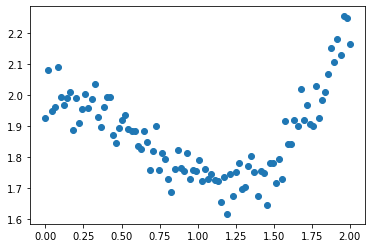

In [10]:
# dataset : polynôme de degré 3 avec un peu de bruit
x = np.linspace(0, 2, 100)
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)
plt.show()

In [11]:
# todo : développer un modèle statistique qui rentre dans le modèle
# de points ==> curve_fit() qui se sert de la méthode des moindres carrés 
# pour trouver les meilleurs paramètres a, b, c et d d'un modèle f

# définition du modèle :
def f (x, a, b, c, d):
    return a * x**3 +b * x**2 + c * x + d

In [12]:
# utilisation de curve_fit() sur cette fonction f :

# import du module optimize de scipy
from scipy import optimize

In [13]:
# on passe la fonction f et les données du dataset ==> x et y
optimize.curve_fit(f, x, y)

(array([ 0.33371232, -0.61272489,  0.02345173,  1.99586008]),
 array([[ 0.0010446 , -0.0031338 ,  0.00249447, -0.00040526],
        [-0.0031338 ,  0.00967523, -0.00803104,  0.00139649],
        [ 0.00249447, -0.00803104,  0.00712644, -0.00140363],
        [-0.00040526,  0.00139649, -0.00140363,  0.00037627]]))

In [14]:
# on obtient 2 tableaux :
#  1er tableau : les différents paramètres de notre modèle
#  2ième tableau : les différentes covariances entre ces paramètres
# ==> matrice de covariance de notre modèle

In [15]:
# on enregistre les paramètres dans des variables
params, param_cov = optimize.curve_fit(f, x, y)

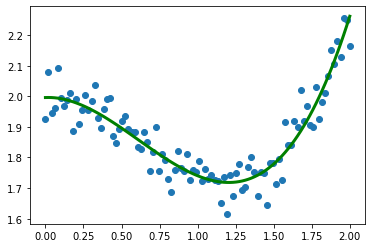

In [16]:
# on affiche le graphique de nuage de points
plt.scatter(x, y)
# et on affiche le modèle en fonction des paramètres trouvés par curve_fit
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)


In [17]:
#  le modèle passe parfaitement bien dans le nuage de points

## (2) Minimize()

In [18]:
#  minimize() : permet de minimizer n'importe quelle fonction
# mathématique

In [19]:
# définition de la fonction f :
def f(x):
    return x**2 + 15*np.sin(x)

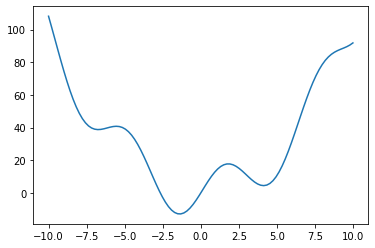

In [20]:
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y) # plt.plot(x, f(x))
plt.show()

In [21]:
#  cette fonction a plusieurs minimums ==> que retourne minimize()?

In [22]:
# on passe la fonction f et un point de départ et x0=-8
# à partir de ce points de départ, la fonction minimize() va appliquer
# un algorithme de minimisation qui va peu à peu converger vers le
# premier minimum qu'il rencontre
# plusieurs méthodes existent : newton, gradient...
optimize.minimize(f, x0=-8)

      fun: 38.81120617595851
 hess_inv: array([[0.11636345]])
      jac: array([-0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.7378995])

In [23]:
# le plus intéressant est x = coordonnées du minimum local

In [24]:
# mais c'est un minimum local, quel est le global?
# pour le trouver choisir un autre algo ou choisir un autre point de départ
optimize.minimize(f, x0=-5)
# le minimum x trouvé est bien le minimum GLOBAL

      fun: -12.82361688780436
 hess_inv: array([[0.05978674]])
      jac: array([3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505581])

In [25]:
# pour accéder à x ajouter .x:
optimize.minimize(f, x0=-5).x

array([-1.38505581])

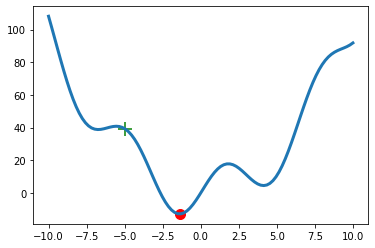

In [26]:
# pour afficher le minimum sur le graphique mettre dans variable resultat
x0=-5
result = optimize.minimize(f, x0=x0).x
plt.plot(x, f(x), lw=3, zorder=1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

In [27]:
# on peut aussi l'utiliser avec des fonctions à n dimension
# exemple en 2 dimensions
def f(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

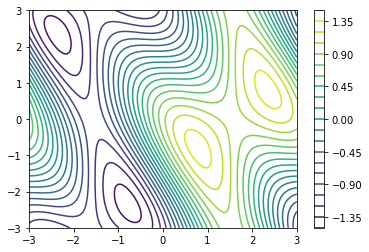

In [28]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)
plt.colorbar()
plt.show()

In [29]:
#  trouver le minimum de cette fonction 2D : en bleu ?

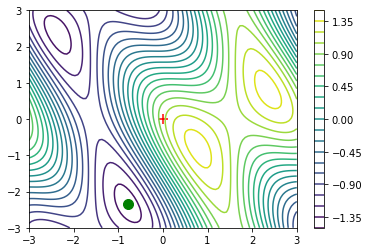

In [30]:
# 2D ==> 2 points de départ à définir
x0 = np.zeros((2,1))

# dessiner ce point x0 sur le graph
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)
plt.colorbar()
plt.scatter(x0[0], x0[1], c='r', marker='+', s=100)

# on passe le point de départ dans optimize() sauvegarder dans result
result = optimize.minimize(f, x0=x0).x

# avec matplotlib ajouter le minimum trouver sur le graph
plt.scatter(result[0], result[1], c='g', s=100)

# dessiner le graph
plt.show()

## (3) Traitement du signal

## (3-1) Signal PROCESSING

In [31]:
#  signal processing : permet d'élimner toute tendance linéaire
# qu'on aurait dans un signal

### Fonction : detrend()

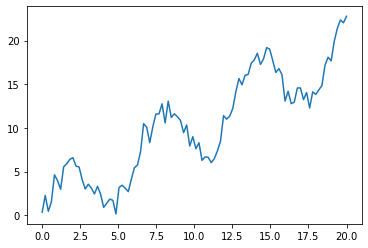

In [32]:
# le signal à l'écran avec tendance
# 100 points aléatoires entre 0 à 20
x = np.linspace(0, 20, 100)
y = x + 4 * np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)
plt.show()

In [33]:
# importer le module signal
from scipy import signal

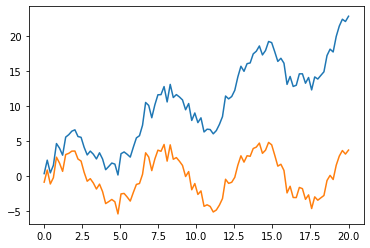

In [34]:
#  enregistre le résultat, en passant juste la fonction
new_y = signal.detrend(y)
# on affiche les 2 dans matplotlib

plt.plot(x, y)
plt.plot(x, new_y)
plt.show()

# on a éliminer la tendance linéaire qu'on avait auparavant

## (3-2) - TRANSFORMATION DE FOURIER

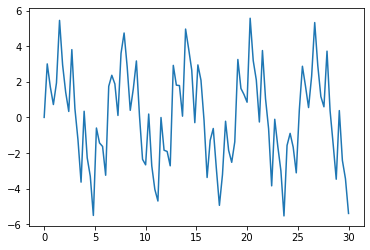

In [35]:
# exemple transfo de Fourier

x = np.linspace(0, 30, 100)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)
plt.show()

In [36]:
# charger le module fftpack
from scipy import fftpack

C:\Users\Outils\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


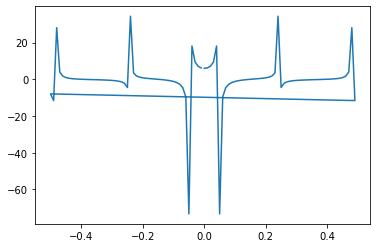

In [37]:
# créer une variable de Fourier
fourier = fftpack.fft(y)
# créer une variable fréquences en faisant passer le nombre d'élément de y
frequences = fftpack.fftfreq(y.size)
# tracer le spectre
plt.plot(frequences, fourier)
plt.show()

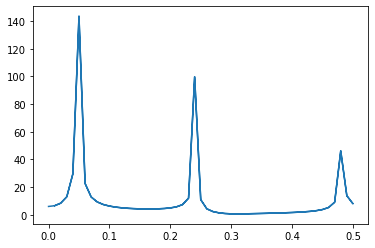

In [38]:
#  mais le tracé peut être affiné, on a des fréquences négatives et
# amplitudes négatives ==> filtrer
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
freq = np.abs(frequences)
# tracer le spectre filtrer
plt.plot(freq, power)
plt.show()
# 3 pics ==> 3 fréquences

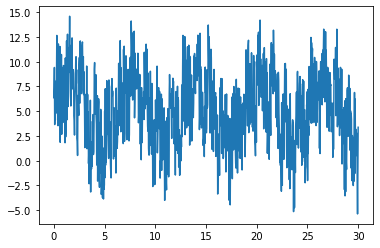

In [39]:
#  à quoi ça sert? ==> infini
#  pour filtrer un signal

# Un signal très bruyant
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)
plt.show()


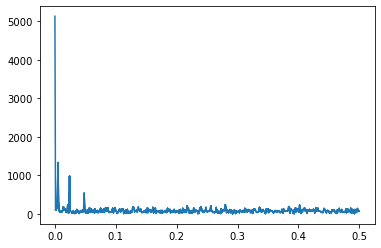

In [40]:
# ETAPE 1 : création du spectre du sugnal bruyant
from scipy import fftpack

fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
freq = np.abs(frequences)
# tracer le spectre filtrer
plt.plot(freq, power)
plt.show()


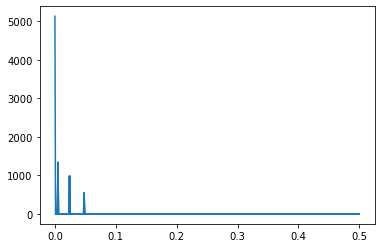

In [41]:
# ETAPE 2 : filtre de la fonction de Fourier
# filtre pour toutes les valeurs inférieur à 400 avec boolean indexing
fourier[power<400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()
# le spectre est nettoyé : plus de bruit

C:\Users\Outils\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


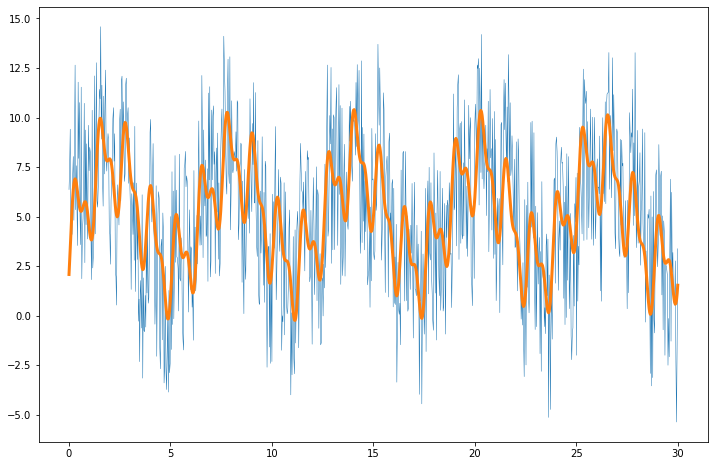

In [42]:
# ETAPE 3 : prendre le spectre nettoyé et appliquer la transfo de fourier
# inverse 
filtered_signal = fftpack.ifft(fourier)
# on affiche
plt.figure(figsize=(12,8))
# singal de départ
plt.plot(x, y, lw=0.5)
# signal filtré
plt.plot(x, filtered_signal, lw=3)
plt.show()

## (3-3) - TRAITEMENT D'IMAGE

## Module ndimage

In [43]:
# chargement de la librairie
from scipy import ndimage

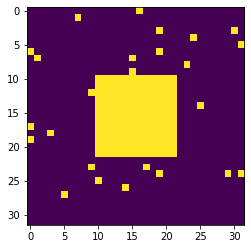

In [44]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)
plt.show()

## ndimage.binary_opening - combinaison dilation/érosion

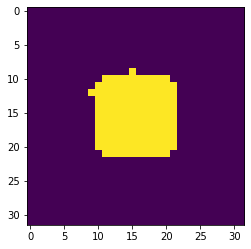

In [45]:
# but : retirer les petits pixels parasites
# en utilisant ndimage.binary_opening
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
plt.show()

In [46]:
# on a supprimer les artefacts mais l'image est un peu érodée 
# toute fonction a un coût

(507, 537, 3)


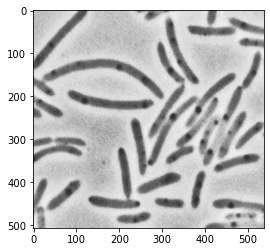

In [47]:
# importer l'image
image = plt.imread('bacteria.png')

print(image.shape) # 3 dimensions

# l'afficher
plt.imshow(image)
plt.show()


(507, 537)


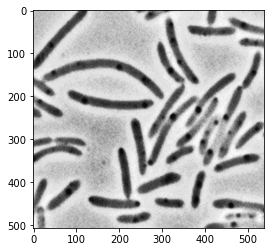

In [48]:
# importer l'image
image = plt.imread('bacteria.png')

#  la réduire en 2 dimensions
image = image[:, :, 0]
print(image.shape) # 2 dimensions

# l'afficher en 2D et en noir et blanc
plt.imshow(image, cmap='gray')
plt.show()



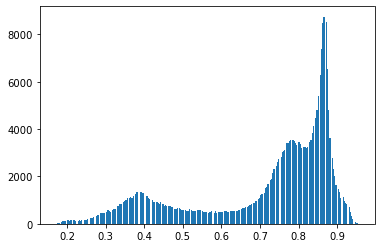

In [49]:
# 1. extraire les bactéries de l'arrière plan avec boolean indexing

# copie de l'image
image_2=np.copy(image)

# aplatissement de l'image avec ravel() et 255 catégories pour les pixels
# pour analyser l'image
plt.hist(image_2.ravel(), bins=255)
plt.show()
# 3 groupes : du blanc, du noir et du gris clair

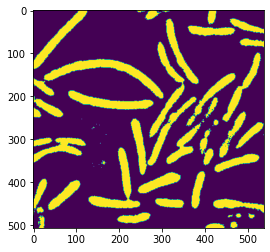

In [50]:
# les bactéries sont les pixels les plus sombres ==> on veut les extraire
# avec du boolean indexing
image = image < 0.6

plt.imshow(image)
plt.show()

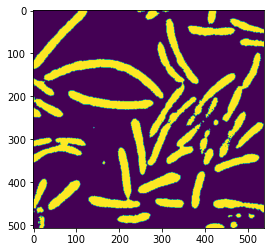

In [51]:
#  2. Se débarasser des quelques artefacts
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)
plt.show()

### ndimage.label() : mettre une étiquette

In [53]:
# 3. utiliser la fonction label pour annoter chaque bactérie
# ndimage.label() retourne 2 variables :
# l'image sur laquelle on veut mettre des étiquettes
# le nombre d'étiquettes qu'on a pu placer sur cette image
label_image, nb_labels = ndimage.label(open_x) 
print(nb_labels) # 53 groupes

53


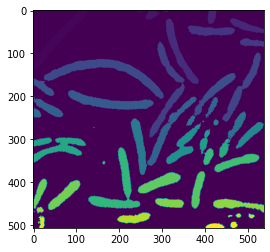

In [54]:
# afficher les 53 groupes
plt.imshow(label_image)

### ndimage.sum() : compter le nombre de pixels/groupe

In [56]:
# ndimage.sum() : mesure le nombre de pixels par groupe 
# permet de connaitre la taille de chaque bactérie (relative)
sizes = ndimage.sum(open_x, label_image, range(nb_labels))

In [57]:
sizes # tableau numpy à 53 éléments

array([0.000e+00, 3.321e+03, 7.500e+01, 4.620e+02, 5.800e+01, 5.220e+02,
       1.167e+03, 2.706e+03, 1.837e+03, 7.720e+02, 3.722e+03, 2.746e+03,
       5.733e+03, 2.060e+03, 8.600e+02, 3.820e+03, 1.222e+03, 2.733e+03,
       4.810e+02, 3.170e+02, 9.790e+02, 2.510e+02, 2.317e+03, 1.180e+02,
       1.000e+01, 1.218e+03, 5.000e+00, 2.176e+03, 5.000e+00, 5.000e+00,
       6.070e+02, 5.860e+02, 2.692e+03, 6.140e+02, 5.000e+00, 4.295e+03,
       5.880e+02, 1.849e+03, 3.600e+01, 1.498e+03, 2.183e+03, 1.006e+03,
       1.825e+03, 1.147e+03, 1.826e+03, 1.690e+02, 1.200e+01, 1.276e+03,
       9.400e+01, 1.070e+02, 3.700e+01, 3.010e+02, 1.900e+02])

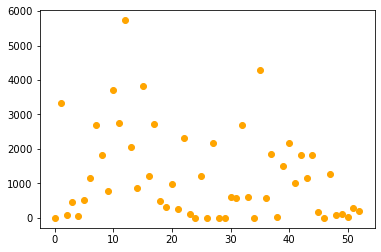

In [59]:
# afficher toutes ses tailles à l'écran
plt.scatter(range(nb_labels), sizes, c='orange')

In [60]:
#  on a un dataset ==> on peut calculer la moyenne, écart type...

## CORRECTION EXERCICE VIDEO 15

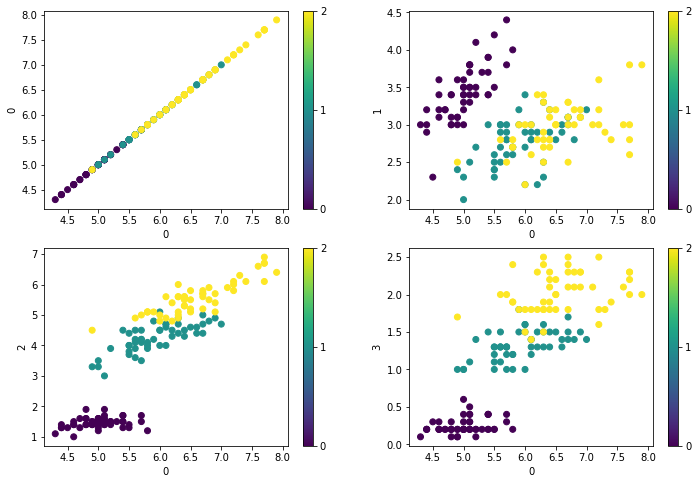

In [62]:
# partir de la fonction graphique et modifier le code pour
# afficher sur une seule figure les différentes variables

# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# dataset
iris = load_iris()
# print(iris)

# dataset
iris = load_iris()
# print(iris)

# données
x = iris.data
# print(x)
# les targets classe 0 1 ou2
y = iris.target
# print(y)

#  Un dictionnaires des données des 100 expériences
data={f'experience{i}': np.random.randn(100) for i in range(4)}

# créer une fonction graphique qui imprime sur 1 même figure le dataset
#  4 expériences ==> 4 graphiques
def graphique(dataset):
    # nombre de colonne = nombre de colonnes
    n = x.shape[1]
    # figure agrandie dans lequel on va placer les 4 graphiques    
    plt.figure(figsize=(12,8))
    # boucle sur le dictionnaire
    for i in range(n): # on boucle sur les 4 variables
        # Graphique i
        # n figure à l'emplacement i de n//2 lignes et colonnes       
        plt.subplot(n//2, n//2, i+1)
        # alimente les ordonnées de l'expérience         
        plt.scatter(x[:, 0], x[:, i], c=y)
        # ajout des labels
        plt.xlabel('0')
        plt.ylabel(i)
        plt.colorbar(ticks=list(np.unique(y)))
    # tracer la figure    
    plt.show()
    
graphique(data)    